In [3]:
#Importing our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_excel('C://Users//asus//Desktop//DataCleaned.xlsx')

In [5]:
#splitting the data 
y=df['Churn Value']
x=df.drop(['Churn Value'],axis=1)

In [9]:
corr_spearman=[]
corr_pearson=[]
corr_kendall=[]
pvalue_spearman=[]
pvalue_pearson=[]
pvalue_kendall=[]
def correlation(feature_names):
    for feature in feature_names:
        corr_spearman.append(stats.spearmanr(x[feature], y)[0])
        pvalue_spearman.append(stats.spearmanr(x[feature], y)[1])
        corr_pearson.append(stats.pearsonr(x[feature], y)[0])
        pvalue_pearson.append(stats.pearsonr(x[feature], y)[1])
        corr_kendall.append(stats.kendalltau(x[feature], y)[0])
        pvalue_kendall.append(stats.kendalltau(x[feature], y)[1])

In [10]:
categorical_features=x.drop(['Tenure Months','Monthly Charges'],axis=1).columns

In [11]:
correlation(categorical_features)

In [13]:
corr_spearman_by_feature=pd.DataFrame({'feature_name':categorical_features,'pvalue':pvalue_spearman,'correlation de spearman':corr_spearman})
corr_kendall_by_feature=pd.DataFrame({'feature_name':categorical_features,'pvalue':pvalue_kendall,'correlation de kendall':corr_kendall})
corr_pearson_by_feature=pd.DataFrame({'feature_name':categorical_features,'pvalue':pvalue_pearson,'correlation de pearson':corr_pearson})


In [18]:
all_corr=pd.DataFrame({'feature_name':categorical_features,'correlation de spearman':corr_spearman,'correlation de kendall':corr_kendall,'correlation de pearson':corr_pearson})


In [19]:
pd.options.display.float_format='{:,.3f}'.format
all_corr


,feature_name,correlation de spearman,correlation de kendall,correlation de pearson
0,Churn Score,0.676,0.555,0.665
1,CLTV,-0.124,-0.101,-0.127
2,Senior Citizen_Yes,0.151,0.151,0.151
3,Partner_Yes,-0.150,-0.150,-0.150
4,Dependents_Yes,-0.249,-0.249,-0.249
5,Multiple Lines_No phone service,-0.012,-0.012,-0.012
6,Multiple Lines_Yes,0.040,0.040,0.040
7,Internet Service_Fiber optic,0.308,0.308,0.308
8,Internet Service_No,-0.228,-0.228,-0.228
9,Online Security_No internet service,-0.228,-0.228,-0.228


In [30]:
corr_spearman=[]
corr_pearson=[]
corr_kendall=[]
pvalue_spearman=[]
pvalue_pearson=[]
pvalue_kendall=[]
def correlation_churn_score(feature_names):
    for feature in feature_names:
        corr_spearman.append(stats.spearmanr(x[feature], x['Churn Score'])[0])
        pvalue_spearman.append(stats.spearmanr(x[feature], x['Churn Score'])[1])
        corr_pearson.append(stats.pearsonr(x[feature], x['Churn Score'])[0])
        pvalue_pearson.append(stats.pearsonr(x[feature], x['Churn Score'])[1])
        corr_kendall.append(stats.kendalltau(x[feature], x['Churn Score'])[0])
        pvalue_kendall.append(stats.kendalltau(x[feature], x['Churn Score'])[1])

In [31]:
features=x.drop(['CLTV','Churn Score'],axis=1).columns


In [32]:
correlation_churn_score(features)

In [33]:
corr_spearman_by_feature=pd.DataFrame({'feature_name':features,'pvalue':pvalue_spearman,'correlation de spearman':corr_spearman})
corr_kendall_by_feature=pd.DataFrame({'feature_name':features,'pvalue':pvalue_kendall,'correlation de kendall':corr_kendall})
corr_pearson_by_feature=pd.DataFrame({'feature_name':features,'pvalue':pvalue_pearson,'correlation de pearson':corr_pearson})

In [35]:
all_corr=pd.DataFrame({'feature_name':features,'correlation de spearman':corr_spearman,'correlation de kendall':corr_kendall,'correlation de pearson':corr_pearson})
all_corr

,feature_name,correlation de spearman,correlation de kendall,correlation de pearson
0,Tenure Months,-0.238,-0.162,-0.225
1,Monthly Charges,0.131,0.088,0.134
2,Senior Citizen_Yes,0.103,0.085,0.102
3,Partner_Yes,-0.113,-0.093,-0.111
4,Dependents_Yes,-0.179,-0.147,-0.175
5,Multiple Lines_No phone service,-0.025,-0.020,-0.024
6,Multiple Lines_Yes,0.043,0.035,0.043
7,Internet Service_Fiber optic,0.211,0.173,0.209
8,Internet Service_No,-0.146,-0.120,-0.146
9,Online Security_No internet service,-0.146,-0.120,-0.146


In [42]:
cov=[]
def cov_churn_score(feature_names):
    for feature in feature_names:
        cov.append(np.cov(x[feature], x['Churn Score'], bias=True)[1][0])

In [9]:
non_corr_features=['Multiple Lines_No phone service','Multiple Lines_Yes','Online Backup_Yes','Streaming TV_Yes','Streaming Movies_Yes','Payment Method_Mailed check']
x=x.drop(non_corr_features,axis=1)

In [10]:
pd.options.display.float_format='{:,.5f}'.format
p_values_by_feature=pd.DataFrame({'feature_name':categorical_features,'pearson':pvalue_pearson,'spearman':pvalue_spearman,'kendall':pvalue_kendall})
p_values_by_feature

,feature_name,pearson,spearman,kendall
0,Senior Citizen_Yes,0.00000,0.00000,0.00000
1,Partner_Yes,0.00000,0.00000,0.00000
2,Dependents_Yes,0.00000,0.00000,0.00000
3,Multiple Lines_No phone service,0.31631,0.31631,0.31628
4,Multiple Lines_Yes,0.00076,0.00076,0.00076
5,Internet Service_Fiber optic,0.00000,0.00000,0.00000
6,Internet Service_No,0.00000,0.00000,0.00000
7,Online Security_No internet service,0.00000,0.00000,0.00000
8,Online Security_Yes,0.00000,0.00000,0.00000
9,Online Backup_No internet service,0.00000,0.00000,0.00000


In [11]:
from scipy.stats import chi2
chi2_pvalues=[]
def chi2_pvalues_fun(feature_names):
    for feature in feature_names:
        dataset_table=pd.crosstab(x[feature],y)
        Observed_Values = dataset_table.values 
        val=stats.chi2_contingency(dataset_table)
        Expected_Values=val[3]
        chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
        chi_square_statistic=chi_square[0]+chi_square[1]
        p_value=1-chi2.cdf(x=chi_square_statistic,df=1)
        chi2_pvalues.append(p_value)

In [12]:
categorical_features=x.drop(['Tenure Months','Monthly Charges'],axis=1).columns
chi2_pvalues_fun(categorical_features)


In [13]:
chi2_pvalues_by_feature=pd.DataFrame({'feature_name':categorical_features,'pvalue':chi2_pvalues})

In [14]:
chi2_pvalues_by_feature

,feature_name,pvalue
0,Senior Citizen_Yes,0.00000
1,Partner_Yes,0.00000
2,Dependents_Yes,0.00000
3,Internet Service_Fiber optic,0.00000
4,Internet Service_No,0.00000
5,Online Security_No internet service,0.00000
6,Online Security_Yes,0.00000
7,Online Backup_No internet service,0.00000
8,Device Protection_No internet service,0.00000
9,Device Protection_Yes,0.00000


In [15]:
from factor_analyzer import FactorAnalyzer

In [16]:
No_internet_service_related=['Online Security_No internet service','Device Protection_No internet service','Online Backup_No internet service','Tech Support_No internet service','Streaming TV_No internet service','Streaming Movies_No internet service']

In [17]:
x=x.drop(No_internet_service_related,axis=1)

In [18]:
fa = FactorAnalyzer(n_factors=6,rotation="varimax")
x.dropna()
fa.fit(x)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [19]:
loading=fa.loadings_

In [20]:
ev , v = fa.get_eigenvalues()

In [21]:
xvals=range(1,x.shape[1]+1)

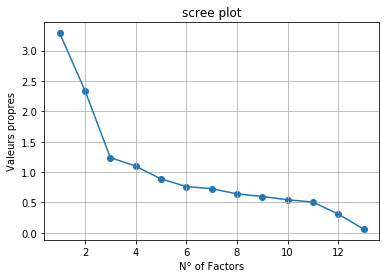

In [22]:
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title('scree plot')
plt.xlabel('N° of Factors')
plt.ylabel('Valeurs propres')
plt.grid()
plt.show()

In [23]:
#Communalities – This is the proportion of each variable’s variance that can be explained by the factors (e.g., the underlying latent continua).  
#It is also noted as h2 and can be defined as the sum of squared factor loadings for the variables.
pd.DataFrame({'feature_name':x.columns,'communalities':fa.get_communalities()})


,feature_name,communalities
0,Tenure Months,0.73601
1,Monthly Charges,1.00369
2,Senior Citizen_Yes,0.17196
3,Partner_Yes,0.30662
4,Dependents_Yes,0.99525
5,Internet Service_Fiber optic,0.89333
6,Internet Service_No,0.87348
7,Online Security_Yes,0.33910
8,Device Protection_Yes,0.33957
9,Tech Support_Yes,0.39914


In [24]:
#explain the correlations between observed variables using a smaller number of factors
pd.DataFrame(loading,x.columns)

,0,1,2,3,4,5
Tenure Months,0.36046,-0.05665,0.12831,0.02613,0.03997,0.76428
Monthly Charges,0.58048,0.52831,-0.00946,-0.01824,0.61787,0.07371
Senior Citizen_Yes,-0.05146,0.38552,-0.00190,-0.10292,0.05522,0.08392
Partner_Yes,0.11601,0.02899,0.03172,0.32545,-0.01895,0.43016
Dependents_Yes,-0.02111,-0.21562,0.00681,0.96450,-0.01793,0.13299
Internet Service_Fiber optic,0.02922,0.55174,-0.02640,-0.02955,0.76577,0.00914
Internet Service_No,-0.67377,-0.58964,0.01425,-0.00335,-0.14536,0.22469
Online Security_Yes,0.55918,-0.04680,0.04943,0.03684,-0.02873,0.13998
Device Protection_Yes,0.49665,0.13986,0.04888,-0.01250,0.13200,0.23103
Tech Support_Yes,0.61313,-0.08103,0.04406,0.00740,0.01876,0.11956


In [25]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.412428
         Iterations 7
                                    Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.287    
Dependent Variable:          Churn Value             AIC:                     5835.4602
Date:                        2020-12-14 20:57        BIC:                     5924.6375
No. Observations:            7043                    Log-Likelihood:          -2904.7  
Df Model:                    12                      LL-Null:                 -4075.1  
Df Residuals:                7030                    LLR p-value:             0.0000   
Converged:                   1.0000                  Scale:                   1.0000   
No. Iterations:              7.0000                                                    
---------------------------------------------------------------------------------------
                                        Coef.  Std.Err.

In [26]:
probit_model=sm.Probit(y,x) 
result=probit_model.fit() 
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.412069
         Iterations 7
                                    Results: Probit
Model:                       Probit                  Pseudo R-squared:        0.288    
Dependent Variable:          Churn Value             AIC:                     5830.4078
Date:                        2020-12-14 20:57        BIC:                     5919.5851
No. Observations:            7043                    Log-Likelihood:          -2902.2  
Df Model:                    12                      LL-Null:                 -4075.1  
Df Residuals:                7030                    LLR p-value:             0.0000   
Converged:                   1.0000                  Scale:                   1.0000   
No. Iterations:              7.0000                                                    
---------------------------------------------------------------------------------------
                                        Coef.  Std.Err

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
clf = LinearDiscriminantAnalysis()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [30]:
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [31]:
clf.score(X_test,y_test)

0.794180269694819

In [32]:
y_pred =clf.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.86      1048
           1       0.61      0.53      0.57       361

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [12]:
x_cat=df.drop(['Tenure Months','Monthly Charges'],axis=1)
from imblearn.under_sampling import RandomUnderSampler
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=1)
x_under, y = under.fit_resample(x_cat, y)

ValueError: Found input variables with inconsistent numbers of samples: [7043, 3738]

In [ ]:
import prince
x_under=x_under.replace(1,'T')
x_under=x_under.replace(0,'F')

In [ ]:
mca = prince.MCA()
mca = mca.fit(x_under) # same as calling ca.fs_r(1)
print(mca)

In [74]:
mca.eigenvalues_

[0.37056399143014207, 0.10055118794707392]

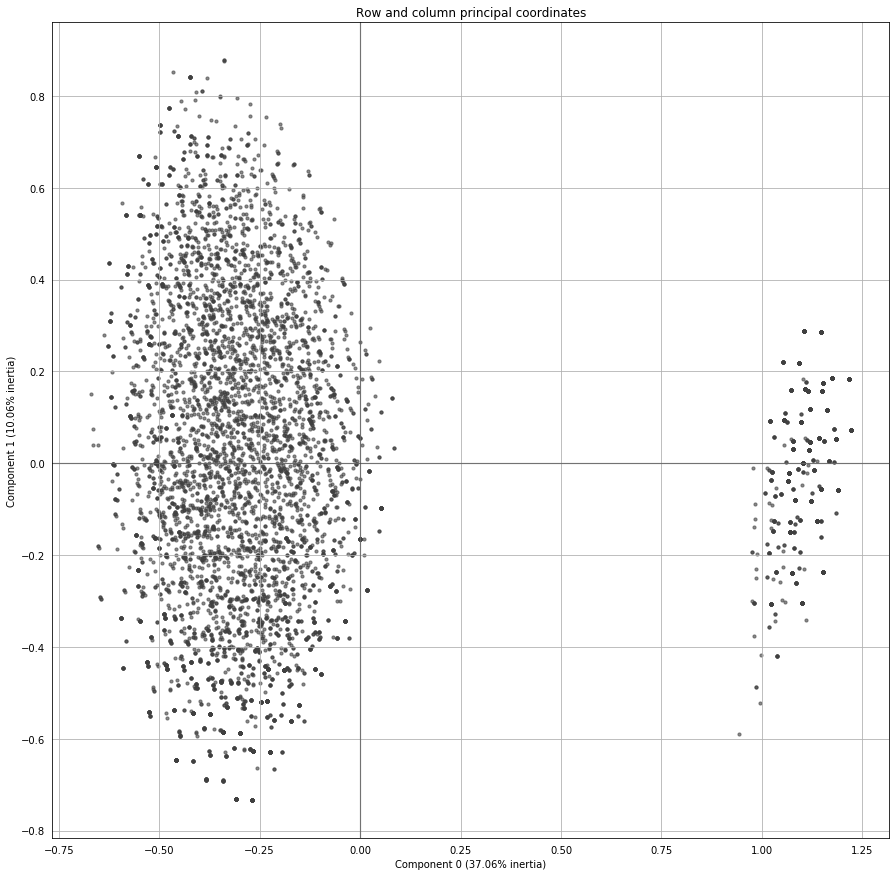

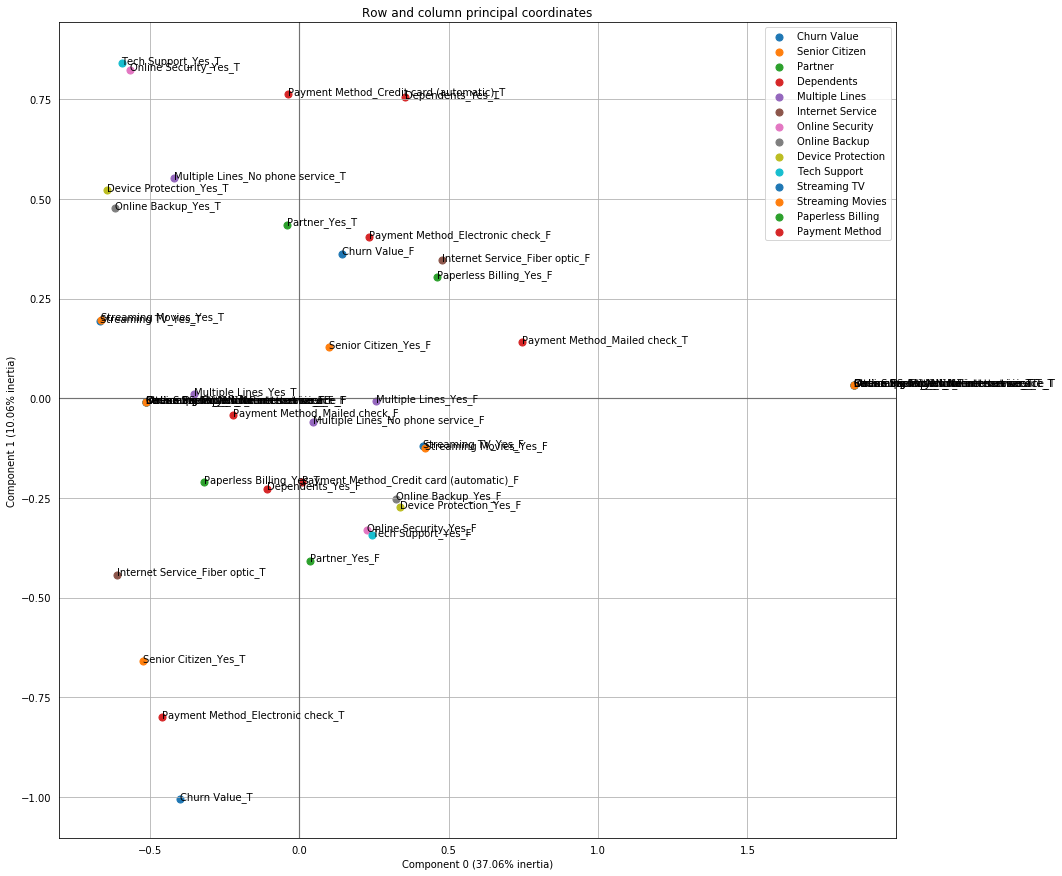

In [76]:
ax = mca.plot_coordinates(
     X=x_cat,
     ax=None,
     figsize=(15,15),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=False,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )
ax = mca.plot_coordinates(
     X=x_cat,
     ax=None,
     figsize=(15,15),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=50,
     show_column_labels=True,
     legend_n_cols=1
     )

In [13]:
mca = mca.transform(x_under) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)

             0         1
0     1.728947  0.067077
1    -0.504466  0.439429
2    -0.439680  0.643176
3    -0.197993 -0.487319
4    -0.425689 -0.767529
...        ...       ...
3733 -0.474721 -0.222012
3734 -0.362095 -0.774302
3735 -0.438176 -0.860444
3736 -0.466144  0.222070
3737 -0.244877 -0.432143

[3738 rows x 2 columns]


In [14]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(mca,y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred_logistic = model.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Logistic classifier on training set: 0.79
Accuracy of Logistic classifier on test set: 0.78


In [16]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       374
           1       0.78      0.77      0.78       374

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748

